# Exploratory Data Analaysis of AirBnB listings in major locations of California - San Francisco, Santa Cruz, Santa Clara, Oakland and Los Angeles

### Overview of the data

Data Source: http://insideairbnb.com/get-the-data.html

Data consists of the Airbnb listings from December 2019. I choose December 2019 to study the pre-COVID19  behavior. 
Data consists of 16 columns which are:
1.	id  –  represents the id of the listing (discrete)
2.	name  –  It is the name of the listing (textual)
3.	host_id  –  host id is a unique Id associated to each host in Airbnb (discrete)
4.	host_name  –  the host’s name (textual)
5.	neighbourhood_group  –  The city in which the listing is present (categorical)
6.	neighbourhood  –  location of the listing (textual)
7.	latitude  –  latitude value of the listing (continuous)
8.	longitude  –  longitude value of the listing (continuous)
9.	room_type  –  Category of the type of listing like entire house, private room etc. (categorical)
10.	price  –  cost per night (continuous)
11.	minimum_nights  –  minimum number of nights that the listing should be booked for (discrete)
12.	number_of_reviews  –  total reviews received by the listing (discrete)
13.	last_review  –  Date when the property received its last review (date)
14.	reviews_per_month  –  the ratio of reviews received, and the time property is listed (continuous)
15.	calculated_host_listings_count  –  the count of listings a host has on Airbnb (continuous)
16.	availability_365  –  the number of days a listing is available in a year (continuous)

Records count is 61,540

Reference for data source: 
http://www.columbia.edu/~sg3637/airbnb_final_analysis.html

### Objectives of the project:

•	Explore and clean the data for any missing values and duplicate data.

•	Perform analysis on the price distribution in various major cities of California.

•	Check if the price has a relation with the minimum stays as well as property type along with location.

• Perform geographical plotting of the price and location, and look for any interesting aspects near the Silicon Valley and the tourist locations in LA.

•	Analyze the behavior of hosts with multiple listings.

•	Understand the relation between reviews count, price and location.

•	Create appropriate visualizations and build a summary of findings from the data.

### Importing the necessary python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
print("Pandas version: ", pd.__version__)

Pandas version:  1.1.2


### Loading the data from source into Pandas Data Frame

Note that the data for each location is available in a csv file. Hence, I downloaded the data for each location and later concatenated them to form a single pandas Data Frame.

In [3]:
sf_data = pd.read_csv("http://data.insideairbnb.com/united-states/ca/san-francisco/2019-12-04/visualisations/listings.csv")
scruz_data = pd.read_csv("http://data.insideairbnb.com/united-states/ca/santa-cruz-county/2019-11-30/visualisations/listings.csv")
sclara_data = pd.read_csv("http://data.insideairbnb.com/united-states/ca/santa-clara-county/2019-12-09/visualisations/listings.csv")
oakland_data = pd.read_csv("http://data.insideairbnb.com/united-states/ca/oakland/2019-12-15/visualisations/listings.csv")
la_data = pd.read_csv("http://data.insideairbnb.com/united-states/ca/los-angeles/2019-12-05/visualisations/listings.csv")

In [4]:
print("Shape of San Francisco dataset: " ,sf_data.shape)
print("Shape of Santa Cruz dataset: \t" ,scruz_data.shape)
print("Shape of Santa Clara dataset: \t" ,sclara_data.shape)
print("Shape of Oakland dataset: \t" ,oakland_data.shape)
print("Shape of Los Angeles dataset: \t" ,la_data.shape)

Shape of San Francisco dataset:  (8533, 16)
Shape of Santa Cruz dataset: 	 (1791, 16)
Shape of Santa Clara dataset: 	 (7744, 16)
Shape of Oakland dataset: 	 (3379, 16)
Shape of Los Angeles dataset: 	 (40125, 16)


### Cleaning the data

In [5]:
#Analysing the count of NaN values present in each feature for all the locations

pd.DataFrame({"San Francisco": sf_data.isnull().sum(), "Santa Cruz": scruz_data.isnull().sum(), 
              "Santa Clara": sclara_data.isnull().sum(), "Oakland": oakland_data.isnull().sum(),
              "Los Angeles": la_data.isnull().sum()
             })

San Francisco  Santa Cruz  Santa Clara  \
id                                          0           0            0   
name                                        0           0            1   
host_id                                     0           0            0   
host_name                                  54          18            1   
neighbourhood_group                      8533        1791         7744   
neighbourhood                               0           0            0   
latitude                                    0           0            0   
longitude                                   0           0            0   
room_type                                   0           0            0   
price                                       0           0            0   
minimum_nights                              0           0            0   
number_of_reviews                           0           0            0   
last_review                              1891         200         1398   
reviews_per_month                        1891         200         1398   
calculated_host_listings_count              0           0            0   
availability_365                            0           0            0   

                                Oakland  Los Angeles  
id                                    0            0  
name                                  0            2  
host_id                               0            0  
host_name                             7          435  
neighbourhood_group                3379            0  
neighbourhood                         0            0  
latitude                              0            0  
longitude                             0            0  
room_type                             0            0  
price                                 0            0  
minimum_nights                        0            0  
number_of_reviews                     0            0  
last_review                         566         8145  
reviews_per_month                   566         8145  
calculated_host_listings_count        0            0  
availability_365                      0            0

Based on the above statistics, I conclude that there are missing values in the name, host name, last review and reviews per month features. In regards to neighbourhood_group, I noticed that except LA, all other cities have a NaN value.

So let's look into neighbourhood_group further.

In [6]:
la_data["neighbourhood_group"].value_counts()

City of Los Angeles     24367
Other Cities            12986
Unincorporated Areas     2772
Name: neighbourhood_group, dtype: int64

In [7]:
print("Comparing the price distribution between LA's - City of Los Angeles, Other Cities and Unincorporated areas:")
pd.DataFrame({"City of Los Angeles":la_data[la_data["neighbourhood_group"]=="City of Los Angeles"]["price"].describe(),"Other Cities":la_data[la_data["neighbourhood_group"]=="Other Cities"]["price"].describe(),"Unincorporated Areas":la_data[la_data["neighbourhood_group"]=="Unincorporated Areas"]["price"].describe()})


Comparing the price distribution between LA's - City of Los Angeles, Other Cities and Unincorporated areas:


City of Los Angeles  Other Cities  Unincorporated Areas
count         24367.000000  12986.000000           2772.000000
mean            227.580909    234.795549            168.592352
std             623.671864    749.823179            431.749619
min               0.000000      0.000000             10.000000
25%              75.000000     65.000000             50.000000
50%             115.000000    105.000000             90.000000
75%             195.000000    185.000000            160.000000
max           25000.000000  22000.000000          14500.000000

As infered from the above data, the SF Bay area regions neighbourhood_group data is missing for all records. Whereas, for LA, it is categoriesed into three types - 'Other Cities', 'City of Los Angeles', 'Unincorporated Areas'.

However, as in the subject analysis we are comparing only the major locations and the distribution of price is approximately in similar order, I am going to set the neighbourhood_group value to the respective location name

In [8]:
#Filling the NaN value in neighbour_group with the respective location name
sf_data["neighbourhood_group"].fillna("San Francisco", inplace=True)
scruz_data["neighbourhood_group"].fillna("Santa Cruz", inplace = True)
sclara_data["neighbourhood_group"].fillna("Santa Clara", inplace= True)
oakland_data["neighbourhood_group"].fillna("Oakland", inplace=True)
la_data["neighbourhood_group"] = "Los Angeles"

In [9]:
#After cleaning the NaN values in neighbourhood_group
print("Verifying the null value count after filling the neighbourhood_group")
pd.DataFrame({"San Francisco": sf_data.isnull().sum(), "Santa Cruz": scruz_data.isnull().sum(), 
              "Santa Clara": sclara_data.isnull().sum(), "Oakland": oakland_data.isnull().sum(),
              "Los Angeles": la_data.isnull().sum()
             })

Verifying the null value count after filling the neighbourhood_group


San Francisco  Santa Cruz  Santa Clara  \
id                                          0           0            0   
name                                        0           0            1   
host_id                                     0           0            0   
host_name                                  54          18            1   
neighbourhood_group                         0           0            0   
neighbourhood                               0           0            0   
latitude                                    0           0            0   
longitude                                   0           0            0   
room_type                                   0           0            0   
price                                       0           0            0   
minimum_nights                              0           0            0   
number_of_reviews                           0           0            0   
last_review                              1891         200         1398   
reviews_per_month                        1891         200         1398   
calculated_host_listings_count              0           0            0   
availability_365                            0           0            0   

                                Oakland  Los Angeles  
id                                    0            0  
name                                  0            2  
host_id                               0            0  
host_name                             7          435  
neighbourhood_group                   0            0  
neighbourhood                         0            0  
latitude                              0            0  
longitude                             0            0  
room_type                             0            0  
price                                 0            0  
minimum_nights                        0            0  
number_of_reviews                     0            0  
last_review                         566         8145  
reviews_per_month                   566         8145  
calculated_host_listings_count        0            0  
availability_365                      0            0

In [10]:
! pip install missingno

<AxesSubplot:>

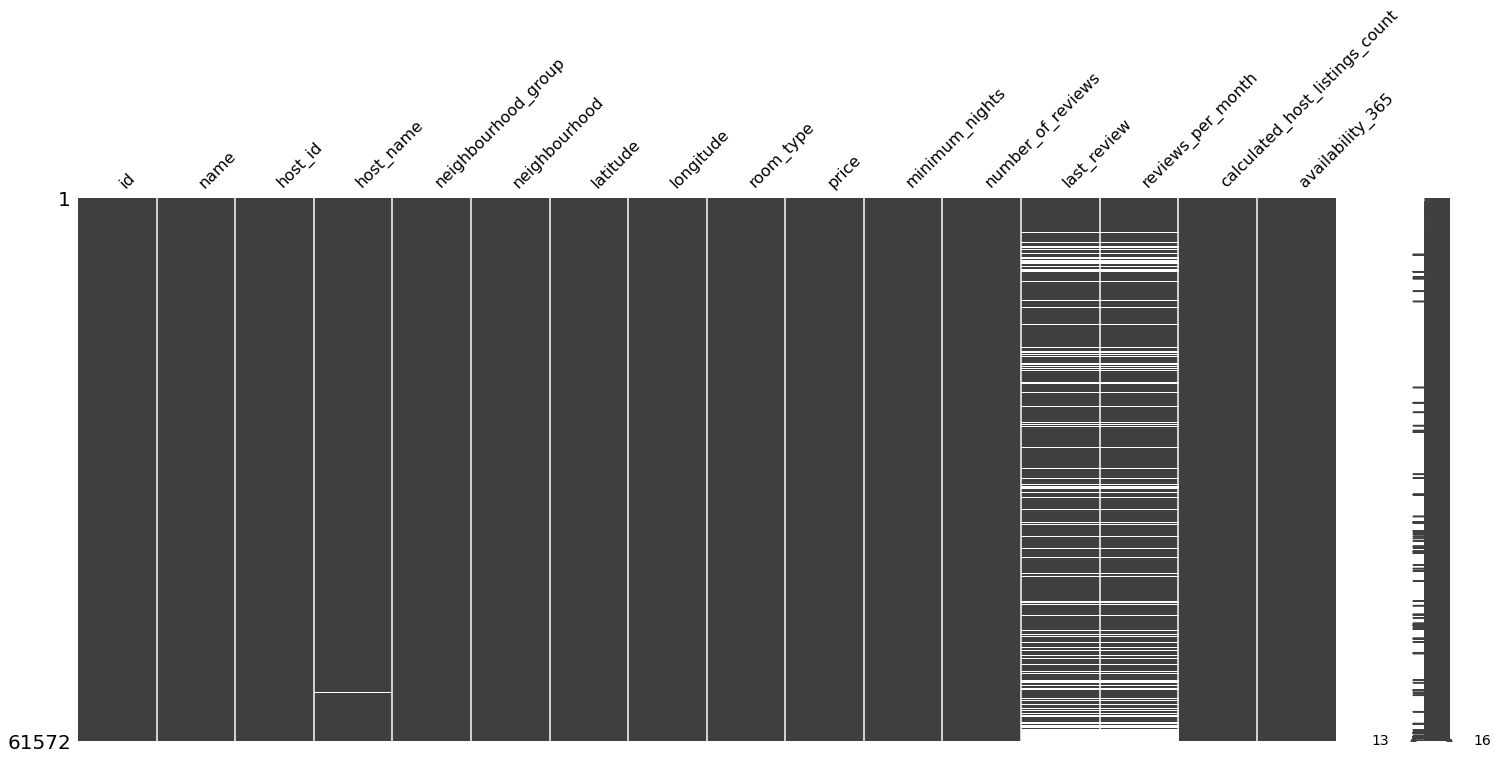

In [11]:
#Visualising the missing values
import missingno as msno
msno.matrix(pd.concat([sf_data,scruz_data,sclara_data,oakland_data,la_data]))  

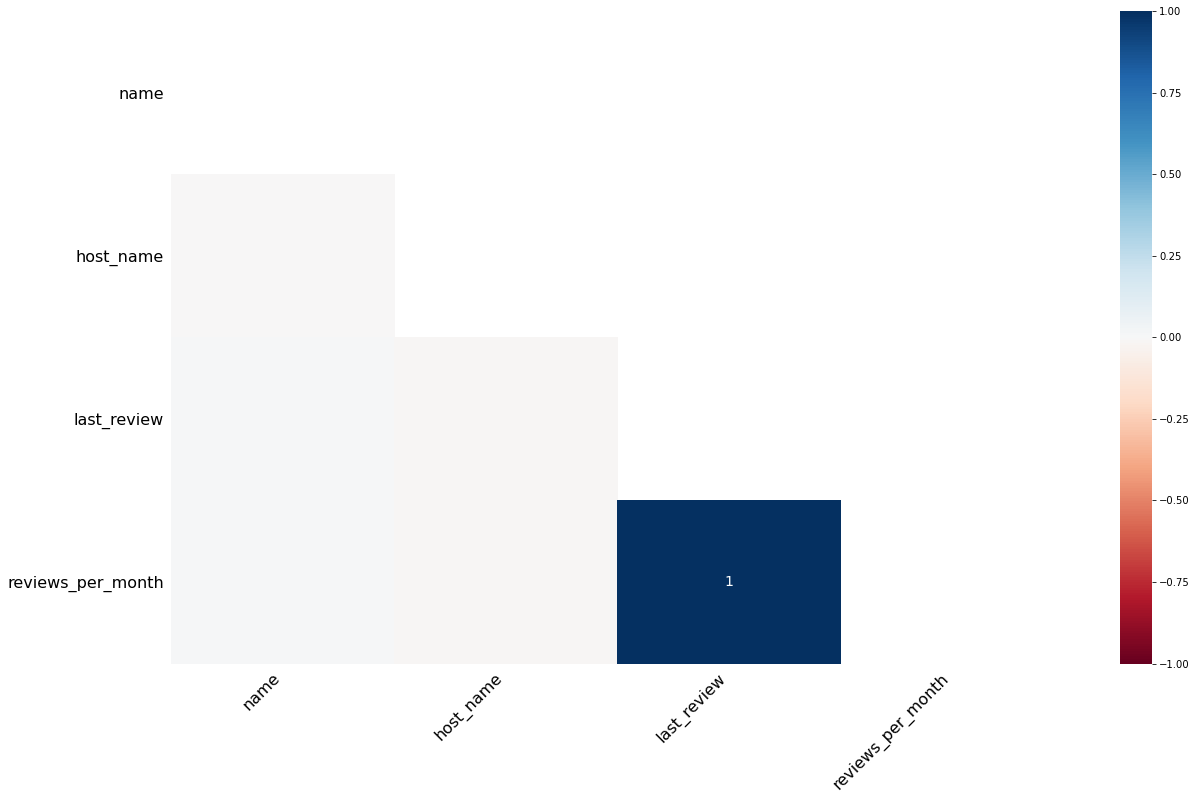

In [12]:
msno.heatmap(pd.concat([sf_data,scruz_data,sclara_data,oakland_data,la_data]))
plt.show()

From the heat map, I conclude that the last_review is missing for the same listings with review_per_month missing.
So these are the listing with no reviews yet. 
Hence, these listings can be ignored during review analysis

# Feature Selection

In [13]:
#Feature names
sf_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Droping the host name from the data to anonymize the analysis and for ethical reasons:

In [14]:
#Dropping the host_name from the data for anonymising the analysis and for ethical purposes
data = pd.concat([sf_data,scruz_data,sclara_data,oakland_data,la_data])

data.drop("host_name",axis=1,inplace=True)

In [15]:
data.columns

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [16]:
#Also, verifying if the id of the listings is unique and no duplicate listings in the data
data["id"].nunique() == data.shape[0]

True

In [17]:
#converting last_review to datetime type
data["last_review"] = pd.to_datetime(data["last_review"])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61572 entries, 0 to 40124
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              61572 non-null  int64         
 1   name                            61569 non-null  object        
 2   host_id                         61572 non-null  int64         
 3   neighbourhood_group             61572 non-null  object        
 4   neighbourhood                   61572 non-null  object        
 5   latitude                        61572 non-null  float64       
 6   longitude                       61572 non-null  float64       
 7   room_type                       61572 non-null  object        
 8   price                           61572 non-null  int64         
 9   minimum_nights                  61572 non-null  int64         
 10  number_of_reviews               61572 non-null  int64         
 11  la

In [19]:
data["room_type"].value_counts()

Entire home/apt    37309
Private room       21401
Shared room         2367
Hotel room           495
Name: room_type, dtype: int64

In [20]:
#Considering room_type as a categorical variable
data["room_type"] = data["room_type"].astype("category")

In [21]:
#Considering neighbourhood_group as a categorical variable
data["neighbourhood_group"] = data["neighbourhood_group"].astype("category")

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61572 entries, 0 to 40124
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              61572 non-null  int64         
 1   name                            61569 non-null  object        
 2   host_id                         61572 non-null  int64         
 3   neighbourhood_group             61572 non-null  category      
 4   neighbourhood                   61572 non-null  object        
 5   latitude                        61572 non-null  float64       
 6   longitude                       61572 non-null  float64       
 7   room_type                       61572 non-null  category      
 8   price                           61572 non-null  int64         
 9   minimum_nights                  61572 non-null  int64         
 10  number_of_reviews               61572 non-null  int64         
 11  la

In [23]:
data[["price","minimum_nights","number_of_reviews","calculated_host_listings_count","availability_365"]].describe()

price  minimum_nights  number_of_reviews  \
count  61572.000000    6.157200e+04       61572.000000   
mean     212.897307    1.634932e+03          35.727376   
std      563.777631    4.030030e+05          64.317161   
min        0.000000    1.000000e+00           0.000000   
25%       74.000000    1.000000e+00           1.000000   
50%      116.000000    2.000000e+00           9.000000   
75%      199.000000    3.000000e+01          41.000000   
max    25000.000000    1.000000e+08         788.000000   

       calculated_host_listings_count  availability_365  
count                    61572.000000      61572.000000  
mean                        13.334308        159.788800  
std                         46.496952        139.499638  
min                          1.000000          0.000000  
25%                          1.000000         13.000000  
50%                          2.000000        135.000000  
75%                          6.000000        319.000000  
max                        428.000000        365.000000

**Inferences made from the above statistical summary**

**price** - ranges from 0 to 25000, per night. However, 75 percentile of the listings have price <= $199 per night. The data looks to be right tailed.

I should drop the records with zero price, as this is not a valid data based on domain knowledge.

**minimum nights** - ranges from 1 to 100000000, with 50 percentile of listings of 2 nights.

I should be dropping the data with minimum nights 100000000 as such a listing is an outlier.

**reviews** - There are listings with no reviews to listings with a maximum of 788 reviews. General range of reviews is 1 to 10.

#### Cleaning the price values

In [24]:
#Analysing the price data

data[data["price"]==0]["price"].count()

9

It implies that there are 9 listings with price as zero. Deleting these records as no listings can have zero price

In [25]:
# Deleting the 9 records with price value zero, as they are not valid
data = data[data["price"]>0]

In [26]:
data[data["price"]==0]["price"].count()

0

In [27]:
data["price"].min()

10

#### Cleaning the minimum nights outliers

Droping the records whose minimum nights is more than 365 days. As general lease agreement is not more than a year long.

In [28]:
#Analysing the records count whose minimum_nights is greater than 365
data[data["minimum_nights"]>365].shape[0]

12

In [29]:
#dropping the outlier whose minimum nights is greater than 365
data = data[data["minimum_nights"]<=365]

In [30]:
data["minimum_nights"].max()

365

In [31]:
data[["price","minimum_nights","number_of_reviews","calculated_host_listings_count","availability_365"]].describe()

price  minimum_nights  number_of_reviews  \
count  61551.000000    61551.000000       61551.000000   
mean     212.841871       10.678267          35.730630   
std      563.678024       19.446768          64.325547   
min       10.000000        1.000000           0.000000   
25%       74.000000        1.000000           1.000000   
50%      116.000000        2.000000           9.000000   
75%      199.000000       30.000000          41.000000   
max    25000.000000      365.000000         788.000000   

       calculated_host_listings_count  availability_365  
count                    61551.000000      61551.000000  
mean                        13.338045        159.811977  
std                         46.504421        139.498717  
min                          1.000000          0.000000  
25%                          1.000000         13.000000  
50%                          2.000000        135.000000  
75%                          6.000000        319.000000  
max                        428.000000        365.000000

#### Analysing the data validity of calculated_host_listings_count

From the above statistics, we can conclude that based on calculated_host_listings_count, the max is 428. 

I am going to verify if the value is equal to the value calculated by grouping records based on host_id

In [32]:
data.groupby("host_id")["price"].count().sort_values(ascending=False)

host_id
48005494     910
107434423    384
219930816    267
18839434     131
4430421      101
            ... 
62551116       1
62552451       1
62561211       1
62566368       1
28             1
Name: price, Length: 34898, dtype: int64

In [33]:
#Analysing of the account has listed same property more than once by verifing if the names of listings are same
data[data["host_id"]==48005494]["name"].value_counts()

2BR in Exciting and Diverse SoMA Location       1
Elegant 1BR in Mountain View, Gym + Pool        1
2BR in Well-Maintained Cupertino Complex        1
Eureka Valley 1BR near Parks and Views          1
Studio Apartment in the Heart of the City       1
                                               ..
Beautiful 3BR Apartment in San Francisco        1
Awesome North LA 1 Bedroom                      1
1BR Condominium in Santa Monica                 1
Charming 1BR in Pacific Heights by Zeus         1
Delightful 2BR w/ Parking in Oakland by Zeus    1
Name: name, Length: 910, dtype: int64

Noticed that all the listings by the host have unique names. So analysing further by looking for value counts based on grouping by neighbourhood, room_type, latitude and longitude values

In [34]:
data[data["host_id"]==48005494][["neighbourhood","room_type","latitude","longitude"]].value_counts()

neighbourhood    room_type        latitude  longitude 
South of Market  Entire home/apt  37.77443  -122.40907    2
Westwood         Entire home/apt  34.07142  -118.46356    1
Mountain View    Entire home/apt  37.39125  -122.05267    1
                                  37.39271  -122.05423    1
                                  37.39268  -122.05288    1
                                                         ..
Santa Clara      Entire home/apt  37.34588  -121.93221    1
                                  37.34555  -121.97585    1
                                  37.34500  -121.93245    1
                                  37.34437  -121.98284    1
Adams Point      Entire home/apt  37.80954  -122.25362    1
Length: 909, dtype: int64

As there are only 2 lisitngs with all the neighbourhood, room_type, latitude and longitude values same, we can conclude that the host is genuine.

Also, as the calculated_host_listings values looks outdated, I will not consider that feature during analysis. Hence, I shall drop the feature.

In [35]:
data.drop("calculated_host_listings_count",axis=1,inplace=True)

In [36]:
data.columns

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'availability_365'],
      dtype='object')

#### Considering the 95 percentile data for analysis, as there few listings whose price distribution is right skewed and are outliers to the overall data.

In [37]:
! pip install plotly==4.11.0
! pip install cufflinks

In [38]:
#Using plotly and cufflinks for interactive plotting of pandas data frame
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
 
import cufflinks as cf
init_notebook_mode(connected = True)
cf.go_offline()

In [39]:
data["price"].iplot(kind="hist")

Above histogram plot, further confirms that the price distribbution of the listings is right skewed.

In [40]:
np.percentile(data["price"],95)

550.0

### Price Distribution analysis

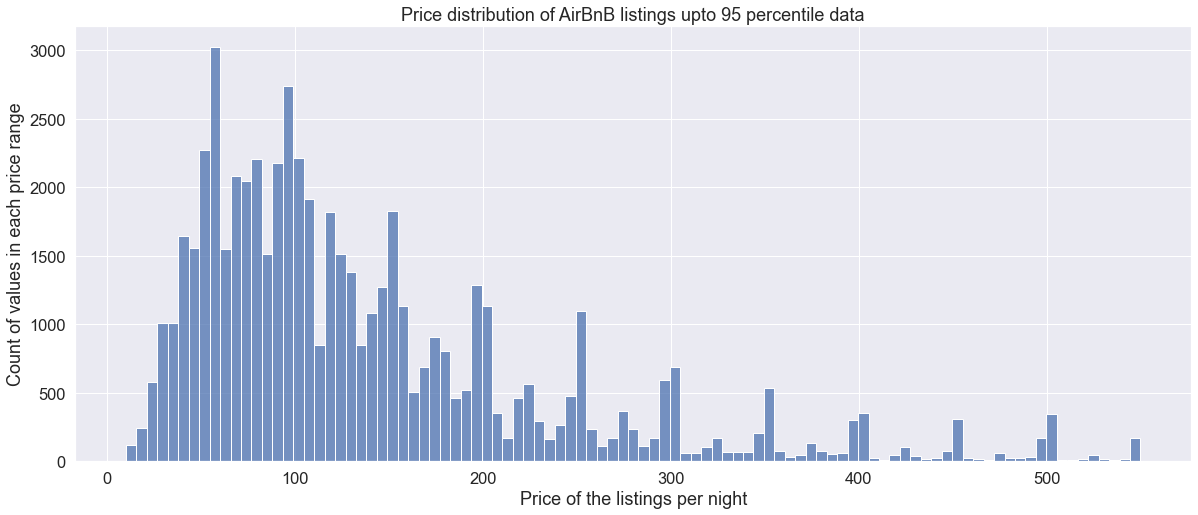

In [41]:
#Considering the 95 percentile data of price
sns.set(rc={'figure.figsize':(20,8)})
sns.set(font_scale=1.5)
sns.histplot(data[data["price"]<=550]["price"],kde=False)
plt.title("Price distribution of AirBnB listings upto 95 percentile data")
plt.xlabel("Price of the listings per night")
plt.ylabel("Count of values in each price range")
plt.show()

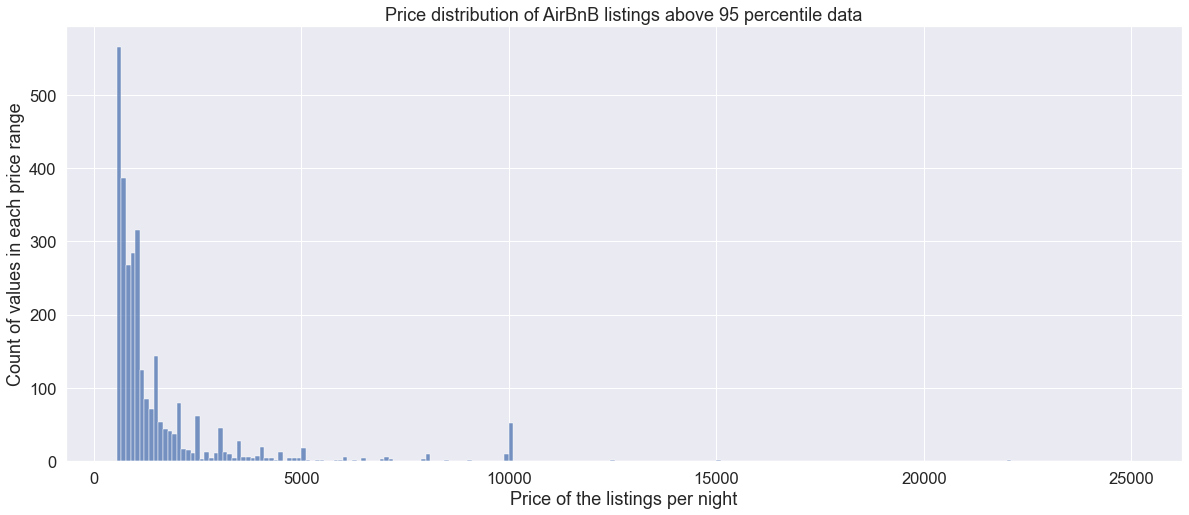

In [42]:
sns.histplot(data[data["price"]>550]["price"],kde=False)
plt.title("Price distribution of AirBnB listings above 95 percentile data")
plt.xlabel("Price of the listings per night")
plt.ylabel("Count of values in each price range")
plt.show()

**Defining a new data frame variable data_95 with upto 95 percentile price distribution lisitngs**

In [43]:
data_95 = data[data["price"]<=np.percentile(data["price"],95)]

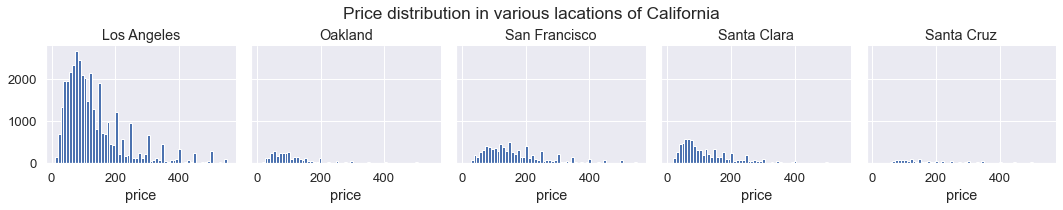

In [44]:
sns.set(font_scale=1.2)
#reference: https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
#Creating a Facet grid plot to compare price distibution across varios locations of California
g = sns.FacetGrid(data=data_95,col="neighbourhood_group",margin_titles=True)
g = g.map(plt.hist, "price",bins=60)

g.set_titles(col_template = '{col_name}')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Price distribution in various lacations of California') 

plt.show()

In [45]:
print("The mean price in each location: ")
data_95.groupby("neighbourhood_group")["price"].mean()

The mean price in each location: 


neighbourhood_group
Los Angeles      134.686462
Oakland          117.944811
San Francisco    170.944822
Santa Clara      129.891601
Santa Cruz       209.103966
Name: price, dtype: float64

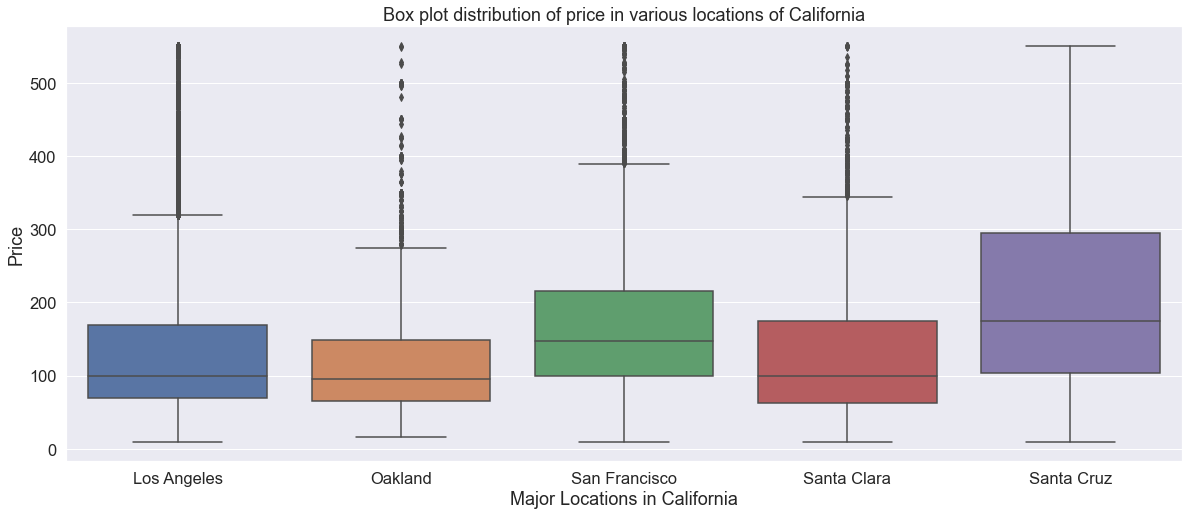

In [46]:
sns.set(font_scale=1.5)

sns.boxplot(data=data_95, x= "neighbourhood_group",y="price")
plt.title("Box plot distribution of price in various locations of California")
plt.xlabel("Major Locations in California")
plt.ylabel("Price")
plt.show()

**Conclusions about price distribution**

1] The median price of Los Angeles, Oakland and Santa Clara are almost the same.

2] Santa Cruz has prices on higher side, followed by San Francisco. Santa Cruz interquantile range is over $200 price range.

3] The starting price range of Oakland is more than all other locations.

I can conclude that there are far more cheaper listings in Los Angeles in comparison to San Francisco. Also, the amount of choices is far more in Los Angeles than in the Silicon valley.

#### Analysing the lisitngs percentage based on each location

In [47]:
listings_count = pd.DataFrame(data["neighbourhood_group"].value_counts())
#Calculating the percentage of listings in each location
listings_count["percentage"] = round((listings_count["neighbourhood_group"]/listings_count["neighbourhood_group"].sum())*100,2)
listings_count

neighbourhood_group  percentage
Los Angeles                  40113       65.17
San Francisco                 8528       13.86
Santa Clara                   7742       12.58
Oakland                       3378        5.49
Santa Cruz                    1790        2.91

**Conclusions aboout listings count**

 Based on above statistics, one can conclude that Los Angeles has 65% of the total listings followed by San Francisco 14% in California.

 Hence, we can infer that AirBnB customers have more options in Los Angeles and possibility of finding an accommodation is high in LA, SF, Santa Clara than in Oakland, Santa Cruz during busy seasons.

**Analysing the top neighbourhoods in LA with maximum listings**



In [48]:
print("Top neighbourhoods in LA with maximum listings in decreasing order:")
print(" \n".join(data_95[data_95["neighbourhood_group"]=="Los Angeles"]["neighbourhood"].value_counts().head(10).index))

Top neighbourhoods in LA with maximum listings in decreasing order:
Hollywood 
Venice 
Long Beach 
Downtown 
Santa Monica 
Hollywood Hills 
West Hollywood 
Westlake 
Koreatown 
Mid-Wilshire


**Analysing the price distribution of top 10 neighbourhoods in LA with maximum listings**

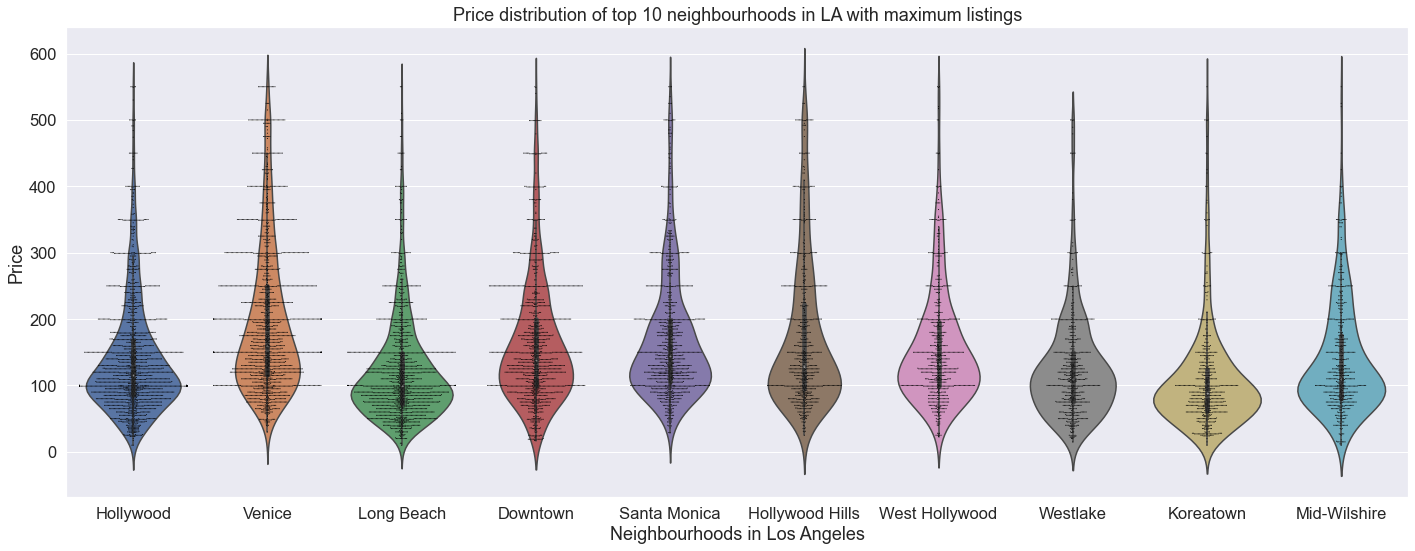

In [49]:
#Price distribution within the above listings

sns.violinplot(data=data_95[data_95["neighbourhood"].isin(['Hollywood', 'Venice', 'Long Beach', 
         'Downtown', 'Santa Monica','Hollywood Hills', 'West Hollywood', 'Westlake', 'Koreatown','Mid-Wilshire'])], 
        x="neighbourhood", y ="price", 
        order = ["Hollywood", "Venice", "Long Beach", "Downtown", "Santa Monica", "Hollywood Hills", 
                 "West Hollywood", "Westlake", "Koreatown", "Mid-Wilshire"])
sns.swarmplot(data=data_95[data_95["neighbourhood"].isin(['Hollywood', 'Venice', 'Long Beach', 
         'Downtown', 'Santa Monica','Hollywood Hills', 'West Hollywood', 'Westlake', 'Koreatown','Mid-Wilshire'])], 
        x="neighbourhood", y ="price", 
        order = ["Hollywood", "Venice", "Long Beach", "Downtown", "Santa Monica", "Hollywood Hills", 
                 "West Hollywood", "Westlake", "Koreatown", "Mid-Wilshire"],size=1,color="black")
plt.title("Price distribution of top 10 neighbourhoods in LA with maximum listings")
plt.xlabel("Neighbourhoods in Los Angeles")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

**Conclusions about the price distribution in top 10 neighbourhoods in LA with maximum listings**

1] Hollywood hills, West Hollywood and Venice are on higher price range.

2] Korean town, West lake and Long beach prices are on lower side.

**Analysing the price distribution of top 8 neighbourhoods in SF with maximum listings**

In [50]:
print("Top neighbourhoods in San Francisco with maximum listings in decreasing order:")
print(" \n".join(data_95[data_95["neighbourhood_group"]=="San Francisco"]["neighbourhood"].value_counts().head(8).index))

Top neighbourhoods in San Francisco with maximum listings in decreasing order:
Mission 
Downtown/Civic Center 
South of Market 
Western Addition 
Castro/Upper Market 
Bernal Heights 
Haight Ashbury 
Outer Sunset


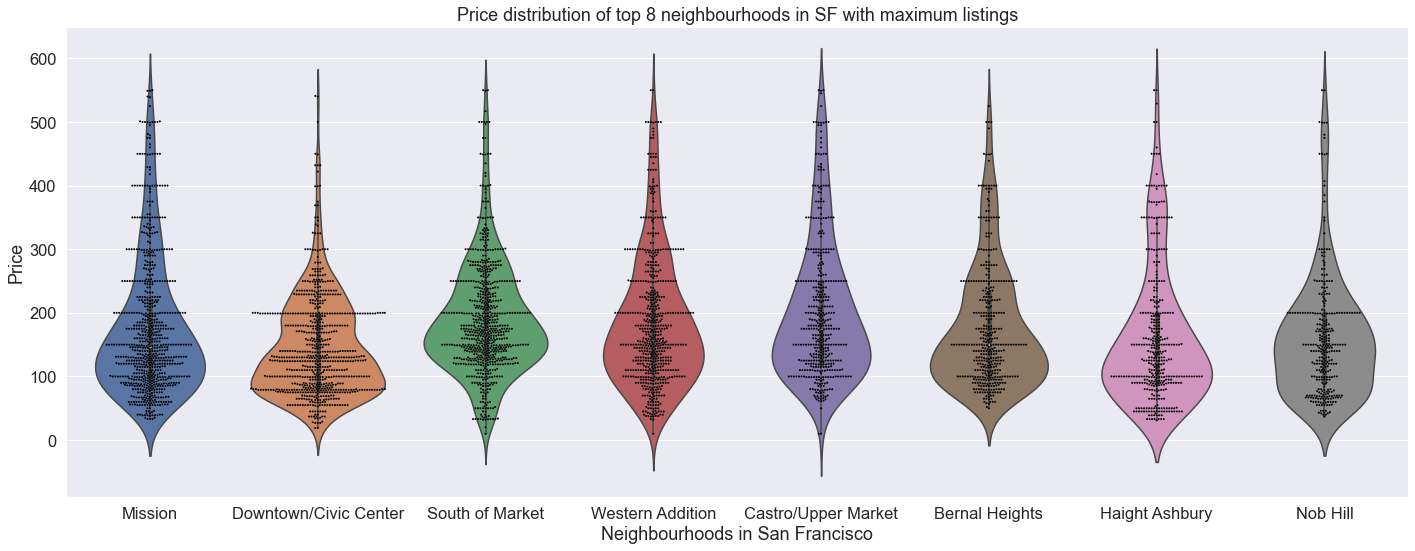

In [51]:
#Price distribution within the above listings

sns.violinplot(data=data_95[data_95["neighbourhood"].isin(['Mission', 'Downtown/Civic Center', 'South of Market',
       'Western Addition', 'Castro/Upper Market', 'Bernal Heights',
       'Haight Ashbury', 'Nob Hill', 'Outer Sunset', 'Noe Valley'])], 
        x="neighbourhood", y ="price", 
        order = ['Mission', 'Downtown/Civic Center', 'South of Market',
       'Western Addition', 'Castro/Upper Market', 'Bernal Heights',
       'Haight Ashbury', 'Nob Hill'],alpha=0.2)
sns.swarmplot(data=data_95[data_95["neighbourhood"].isin(['Mission', 'Downtown/Civic Center', 'South of Market',
       'Western Addition', 'Castro/Upper Market', 'Bernal Heights',
       'Haight Ashbury', 'Nob Hill', 'Outer Sunset', 'Noe Valley'])], 
        x="neighbourhood", y ="price", 
        order = ['Mission', 'Downtown/Civic Center', 'South of Market',
       'Western Addition', 'Castro/Upper Market', 'Bernal Heights',
       'Haight Ashbury', 'Nob Hill'],size=2,color="black")
plt.title("Price distribution of top 8 neighbourhoods in SF with maximum listings")
plt.xlabel("Neighbourhoods in San Francisco")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

**Conclusions about the price distribution in top 8 neighbourhoods in SF with maximum listings**

1] South of Market, Western addition and Castro/Upper Market are on higher price range.

2] Mission, Downtown/Civic center and nob Hill prices are on lower side.

In [52]:
#Comparing the price range for top 2 maxmimum listings neighbourhoods in each city of CA
print("Top 2 maxmimum listings neighbourhoods in each city of CA:")

for i in data_95["neighbourhood_group"].unique():
    print("\n","==="+i+":")
    print("\t",data_95[data_95["neighbourhood_group"]==i]["neighbourhood"].value_counts().head(2).index[0])
    print("\t",data_95[data_95["neighbourhood_group"]==i]["neighbourhood"].value_counts().head(2).index[1])

Top 2 maxmimum listings neighbourhoods in each city of CA:

 ===San Francisco:
	 Mission
	 Downtown/Civic Center

 ===Santa Cruz:
	 Unincorporated Areas
	 City of Santa Cruz

 ===Santa Clara:
	 San Jose
	 Palo Alto

 ===Oakland:
	 Prescott
	 Bushrod

 ===Los Angeles:
	 Hollywood
	 Venice


**Analyzing the minimum nights data**

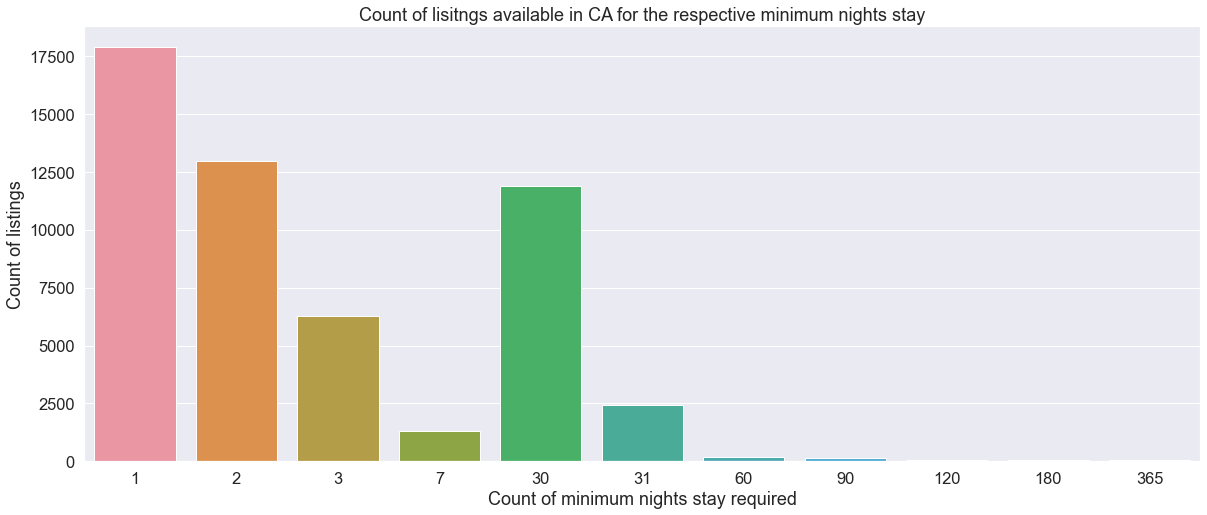

In [53]:
sns.countplot(x=data_95[data_95["minimum_nights"].isin([1,2,3,7,30,31,60,90,120,180,365])]["minimum_nights"])
plt.title("Count of lisitngs available in CA for the respective minimum nights stay")
plt.xlabel("Count of minimum nights stay required")
plt.ylabel("Count of listings")
plt.show()

**Conclusions about the minimum nights**

1] Most of the listings require 1 and 2 night minimum stay.

2] Also, there are a good amount of listings (approx. 12000) for a month time minimum stay in CA.

**Analyzing the minimum nights distribution across various locations of California**

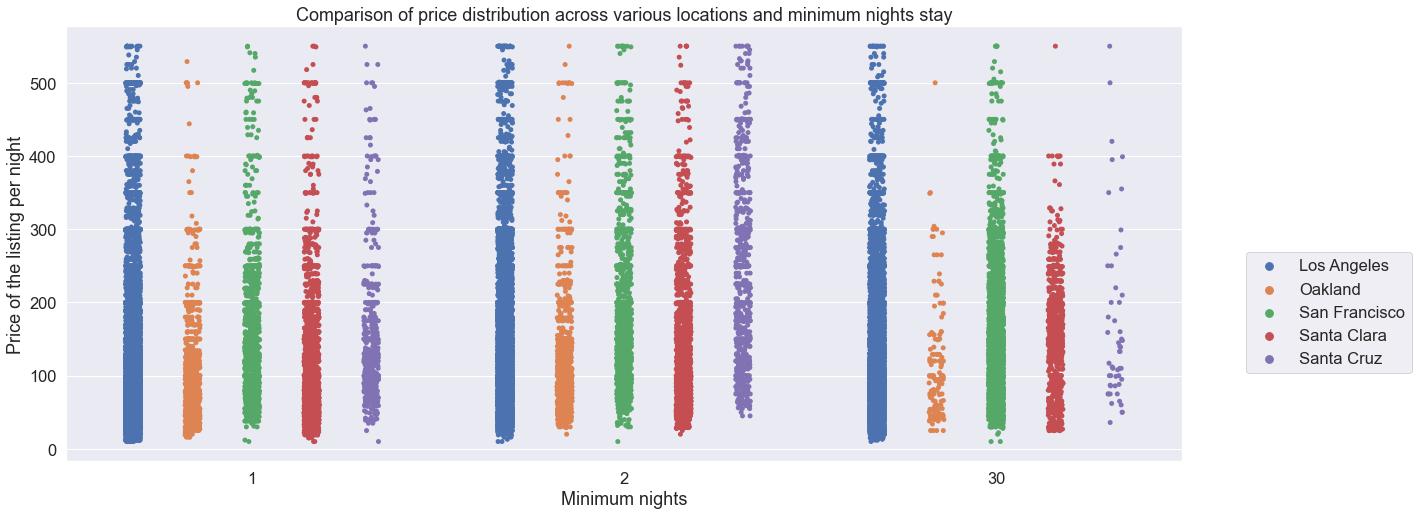

In [54]:
#Analysing the minimum nights
sns.stripplot(data=data_95[(data_95["minimum_nights"].isin([1,2,30]))],x="minimum_nights",y="price", hue = "neighbourhood_group",jitter=True,dodge=True)
plt.legend(bbox_to_anchor=(1.05,0.5))
plt.title("Comparison of price distribution across various locations and minimum nights stay")
plt.xlabel("Minimum nights")
plt.ylabel("Price of the listing per night")
plt.show()

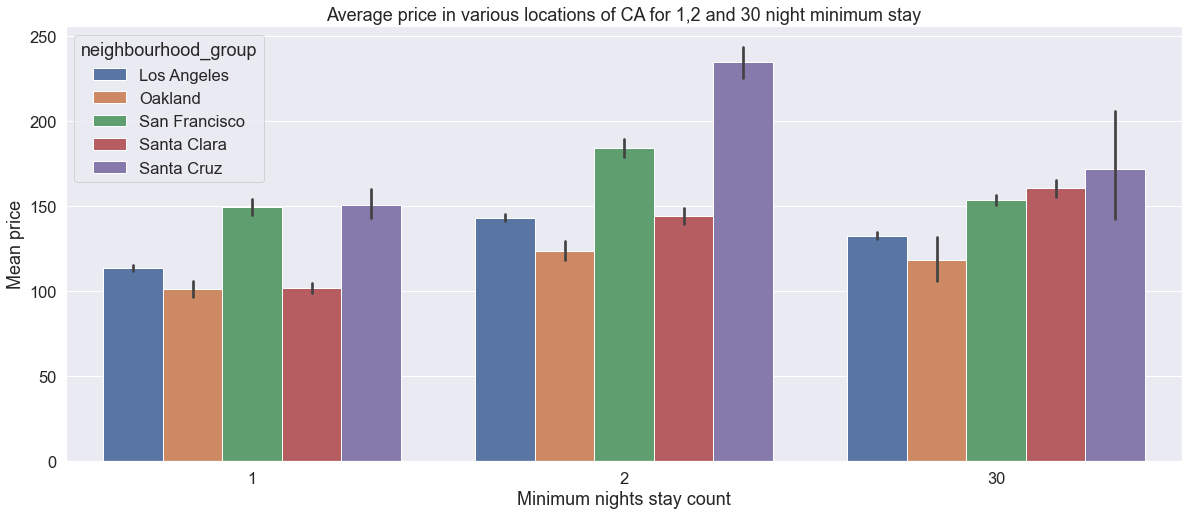

In [55]:
sns.barplot(data=data_95[(data_95["minimum_nights"].isin([1,2,30]))],x="minimum_nights",y="price", hue = "neighbourhood_group")
plt.title("Average price in various locations of CA for 1,2 and 30 night minimum stay")
plt.xlabel("Minimum nights stay count")
plt.ylabel("Mean price")
plt.show()

**Conclusions about minimum nights stay in various locations of California**

1] For 1, 2 nights: There are lot of listings in all the locations.

2] Whereas for a long term say 30 days, Los Angeles, SanFrancisco and Santa Clara provides more options.

3] Noticed there is not a significant drop in price on comparing listings with 30 nights and that of one night.

**Analyzing the room types count**

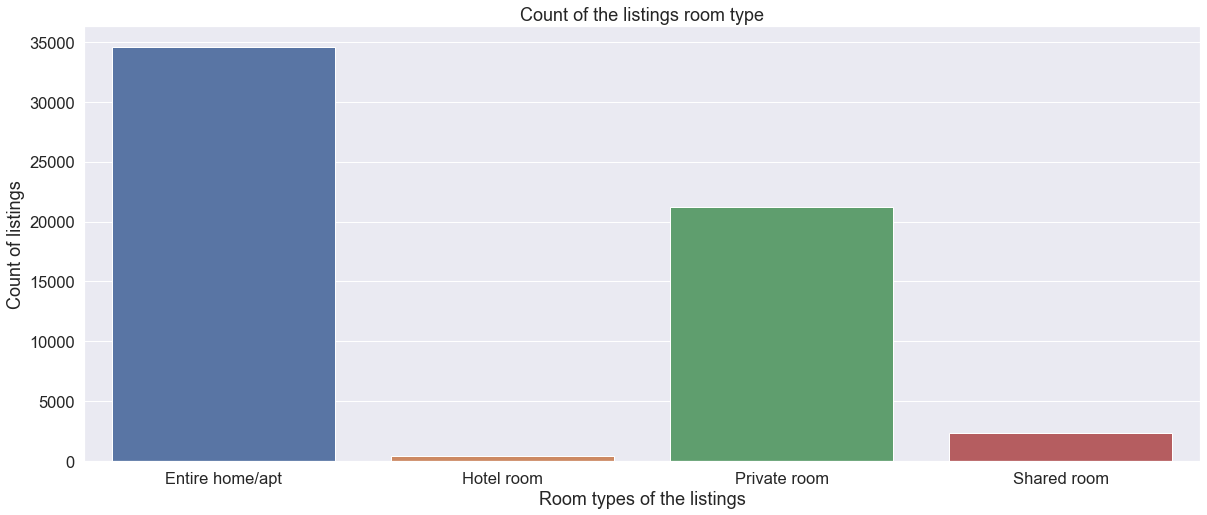

In [56]:
sns.countplot(x=data_95["room_type"])
plt.title("Count of the listings room type")
plt.xlabel("Room types of the listings")
plt.ylabel("Count of listings")
plt.show()

One can notice that, majority of the listings are of Entire home and Private room type.

**Analyzing the listing count relation between minimum nights, location and type of property (room type)**

In [57]:
#Analysing the listing count relation between minimum nights, location and type of property (room type)
data[data["minimum_nights"].isin([1,2,30])].groupby(["neighbourhood_group","room_type","minimum_nights"])["minimum_nights"].count().unstack().iplot(kind="bar",title="Count of lisitngs available in each location and for each room type")

**Conclusions**

**Los Angeles:**

Entire home type is available for 1,2 or 30 days minimum stay with alomst equal counts.

Private room type is available for 1 followed by 2 minimum stays

**San Francisco:**

Entire home type is available for 30 or more days rather than 1 or 2 mimnimum stay days.

Private room is approximately equally available for 1,2 or 30 days minumum stay.

In [58]:
#Analysing the median price in relation to minimum nights, location and type of property (room type)
data[data["minimum_nights"].isin([1,2,30])].groupby(["neighbourhood_group","room_type","minimum_nights"])["price"].mean().unstack().iplot(kind="bar",title="Mean price for each room type in each location")

**Conclusions**

In Los Angeles, San Francisco:

The average price dropped as the minimum stay count increases for entire home type and private room

Whereas, in Santa Cruz, average price increased for entire home type properties as the minimum stay increased. (Anamoly!)

### Geo Spatial plotting to visualise the location of lisitngs

In [59]:
#Geospatial plotting of lisitngs in California
data_lat_long_LA = data_95[data_95["neighbourhood_group"].isin(["Los Angeles"])][["price",'latitude', 'longitude']]
data_lat_long_SF = data_95[data_95["neighbourhood_group"].isin(["San Francisco"])][["price",'latitude', 'longitude']]
data_lat_long_bay= data_95[data_95["neighbourhood_group"].isin(['San Francisco', 'Santa Cruz', 'Santa Clara', 'Oakland'])][["price",'latitude', 'longitude']]
data_lat_long = data_95[["price",'latitude', 'longitude']]

Using follium plugin to view the distribuion of listings in the Bay area

In [60]:
! pip install folium

In [61]:
#reference: https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb/notebook
import folium
from folium.plugins import HeatMap
g=folium.Map([36.7,-122],zoom_start=8)
HeatMap(data_lat_long_bay[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(g)
display(g)

Using follium plugin to view the distribuion of listings in the LA area

In [62]:
g=folium.Map([34,-118.2],zoom_start=10)
HeatMap(data_lat_long_LA[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(g)
display(g)

From the above maps, we can conclude that the listings are concentrated in the downtown region and tourist spots!

### Utilizing Geopandas to plot the price distribuion spatial plot

In [63]:
! pip install geopandas

In [64]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

# import street map
#Source: https://mapcruzin.com/free-united-states-shapefiles/free-california-arcgis-maps-shapefiles.htm
street_map = gpd.read_file("california_coastline") 

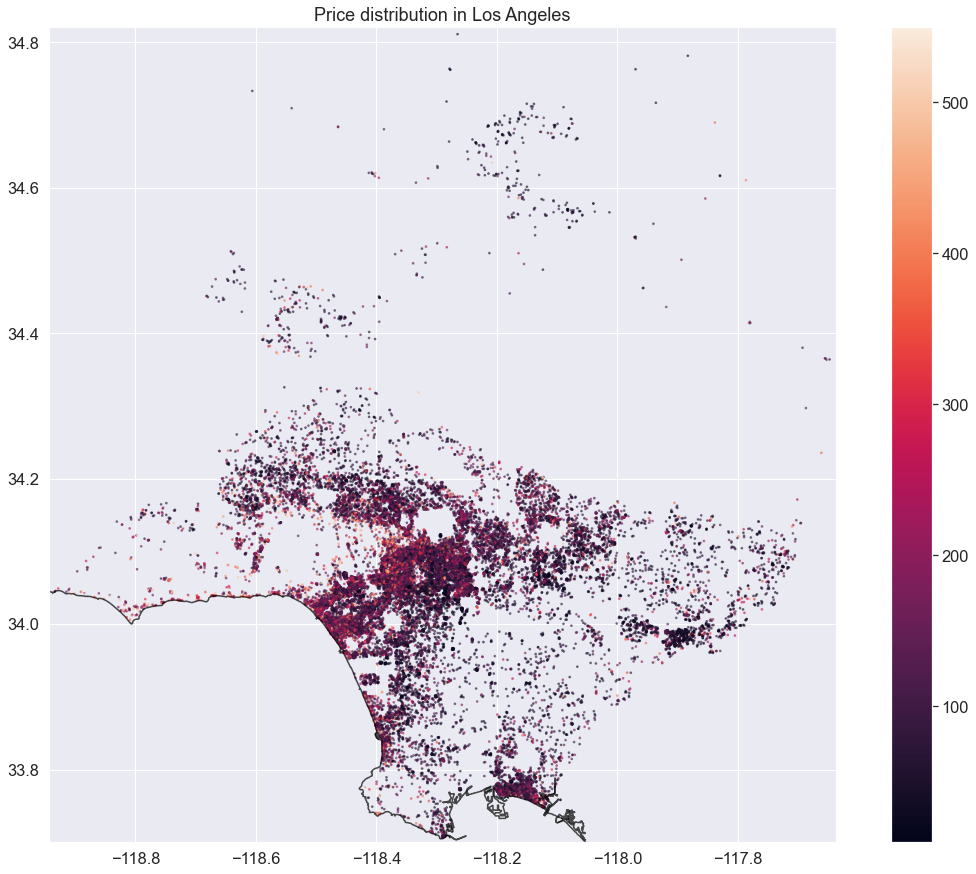

In [65]:
#reference: https://medium.com/@ianforrest11/graphing-latitudes-and-longitudes-on-a-map-bf64d5fca391

# Creating a point by zipping x and y coordinates
geometry = [Point(xy) for xy in zip(data_lat_long_LA["longitude"], data_lat_long_LA["latitude"])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(data_lat_long_LA,crs="EPSG:4326",geometry = geometry)


fig, ax = plt.subplots(figsize=(20,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.7,color="black")

geo_df.plot(column="price",ax=ax,alpha=0.5, legend=True,markersize=3)
plt.title("Price distribution in Los Angeles")
plt.xlim(data_lat_long_LA["longitude"].min()-0.01,data_lat_long_LA["longitude"].max()+0.01)
plt.ylim(33.7,data_lat_long_LA["latitude"].max()+0.01)
plt.show()

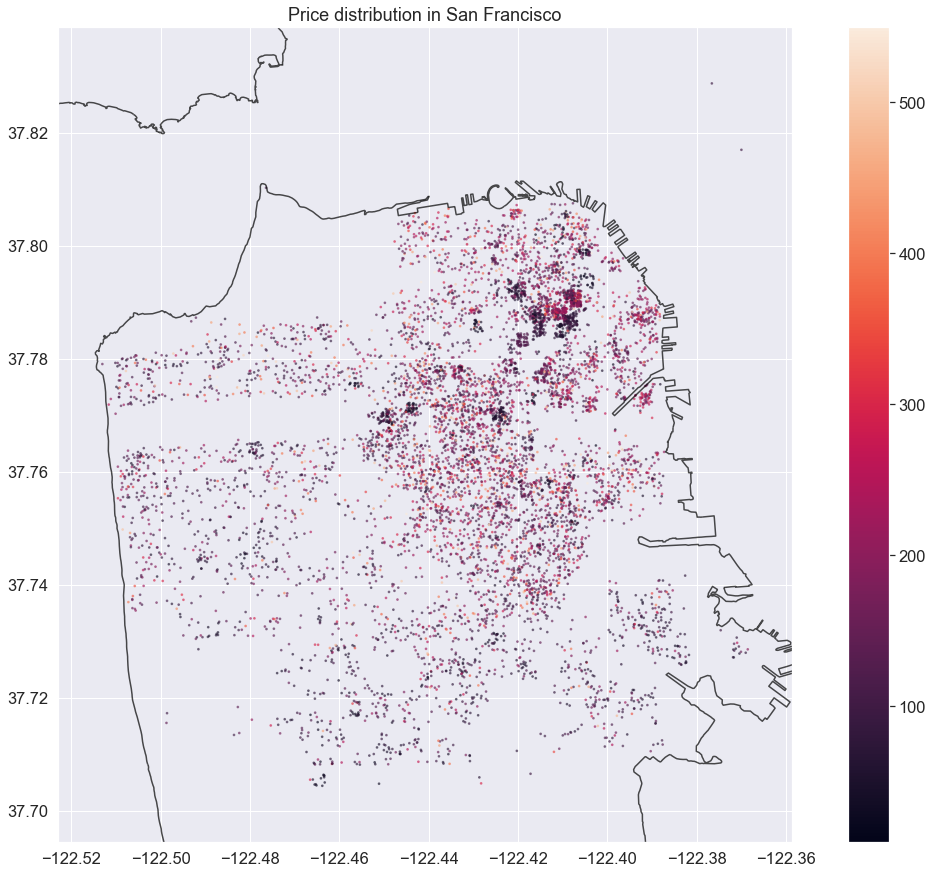

In [66]:

geometry = [Point(xy) for xy in zip(data_lat_long_SF["longitude"], data_lat_long_SF["latitude"])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(data_lat_long_SF,crs="EPSG:4326",geometry = geometry)


fig, ax = plt.subplots(figsize=(20,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.7,color="black")

geo_df.plot(column="price",ax=ax,alpha=0.5, legend=True,markersize=3)
plt.title("Price distribution in San Francisco")
plt.xlim(data_lat_long_SF["longitude"].min()-0.01,data_lat_long_SF["longitude"].max()+0.01)
plt.ylim(data_lat_long_SF["latitude"].min()-0.01,data_lat_long_SF["latitude"].max()+0.01)
plt.show()

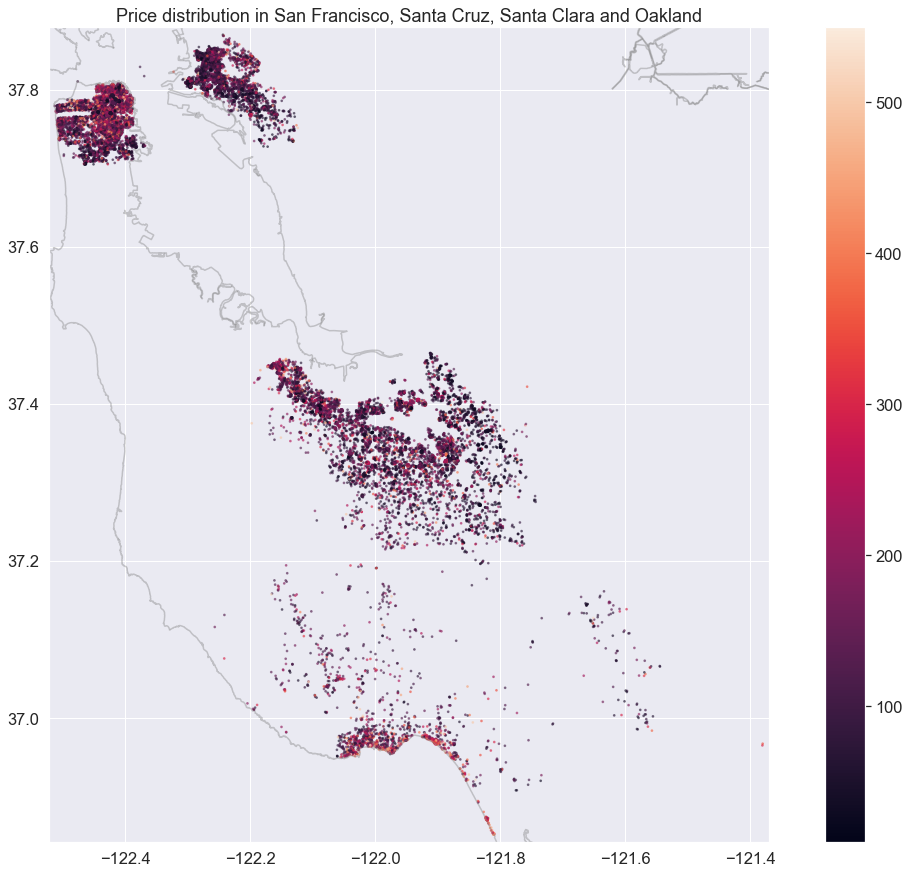

In [67]:
geometry = [Point(xy) for xy in zip(data_lat_long_bay["longitude"], data_lat_long_bay["latitude"])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(data_lat_long_bay,crs="EPSG:4326",geometry = geometry)

# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(20,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color="grey")

geo_df.plot(column="price",ax=ax,alpha=0.5, legend=True,markersize=3)
plt.title("Price distribution in San Francisco, Santa Cruz, Santa Clara and Oakland")
plt.xlim(data_lat_long_bay["longitude"].min()-0.01,data_lat_long_bay["longitude"].max()+0.01)
plt.ylim(data_lat_long_bay["latitude"].min()-0.01,data_lat_long_bay["latitude"].max()+0.01)
plt.show()

### Analyzing the hosts with maximum lisitngs

In [68]:
#Analysings the hosts

data_95["host_id"].value_counts().nlargest(3)

48005494     910
107434423    384
219930816    236
Name: host_id, dtype: int64

The top hosts of California have about 910, 384 and 236 listings

In [69]:
#Top host with most listings
print(data_95[data_95["host_id"]==48005494][["room_type","neighbourhood_group"]].value_counts())
print("Mean price of the listing: ",data_95[data_95["host_id"]==48005494]["price"].mean())

room_type        neighbourhood_group
Entire home/apt  Santa Clara            428
                 San Francisco          254
                 Los Angeles            185
                 Oakland                 43
dtype: int64
Mean price of the listing:  170.3131868131868


From the above data, we can conclude that the top host with maximum listings has a mean price of $170 and all their lisitngs are of "Entire home" type.

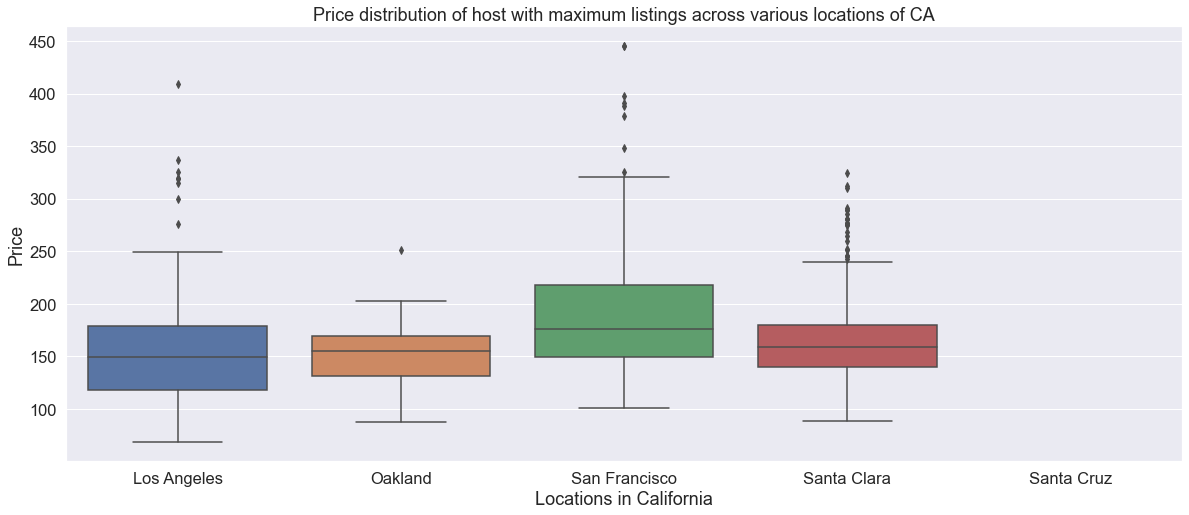

In [70]:
sns.boxplot(data = data_95[data_95["host_id"]==48005494],y="price",x="neighbourhood_group")
plt.title("Price distribution of host with maximum listings across various locations of CA")
plt.xlabel("Locations in California")
plt.ylabel("Price")
plt.show()

The host with maximum listings has his/her properties in Los Angeles, Oakland, San Francisco and Santa Clara with median price around $150

Entire home/apt    384
Shared room          0
Private room         0
Hotel room           0
Name: room_type, dtype: int64


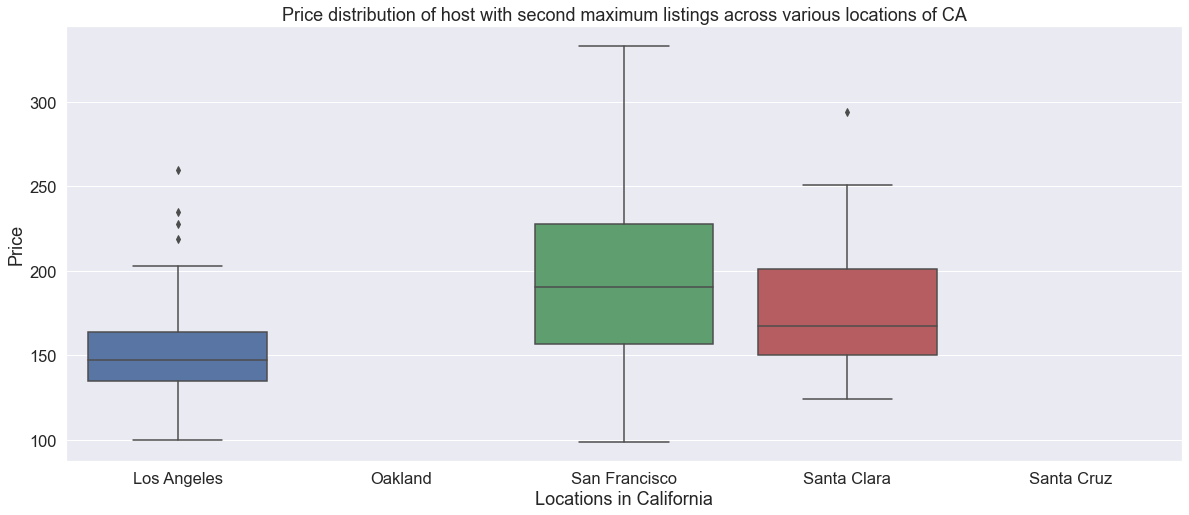

In [71]:
#Second top host
print(data_95[data_95["host_id"]==107434423]["room_type"].value_counts())
sns.boxplot(data = data_95[data_95["host_id"]==107434423],y="price",x="neighbourhood_group")
plt.title("Price distribution of host with second maximum listings across various locations of CA")
plt.xlabel("Locations in California")
plt.ylabel("Price")
plt.show()

The second host with maximum listings has his/her properties in Los Angeles, San Francisco and Santa Clara.

San Francisco listings are on higher price range in comparison to Santa Clara and Los Angeles.

#### Top 15 hosts with maximum listings in decreasing order:

In [72]:
data_95.groupby(["host_id","neighbourhood_group"])["price"].count().nlargest(15).unstack().fillna(0)

neighbourhood_group  Santa Clara  San Francisco  Los Angeles
host_id                                                     
48005494                   428.0          254.0        185.0
219930816                    0.0          232.0          0.0
107434423                    0.0          204.0        162.0
18839434                   123.0            0.0          0.0
4430421                      0.0          101.0          0.0
424793                      90.0            0.0          0.0
154113511                    0.0            0.0         89.0
2917744                     83.0            0.0          0.0
103340667                    0.0           74.0          0.0
147398503                    0.0            0.0         67.0
89613524                     0.0            0.0         62.0
259274154                    0.0            0.0         61.0

From the above, one can notice that the hosts with maximum listings have their properties in Los Angeles, San Francisco and Santa Clara.

### Analysing the reviews count

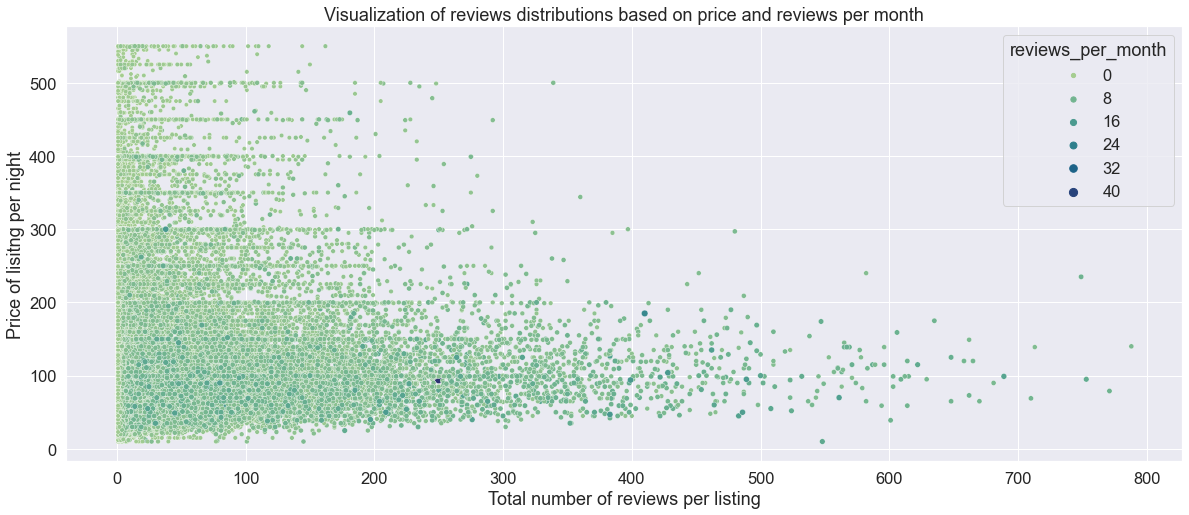

In [73]:
sns.scatterplot(data=data_95, y ="price", x="number_of_reviews", hue= "reviews_per_month",size="reviews_per_month" ,palette="crest",alpha=1)
plt.title("Visualization of reviews distributions based on price and reviews per month")
plt.xlabel("Total number of reviews per listing")
plt.ylabel("Price of lisitng per night")
plt.show()

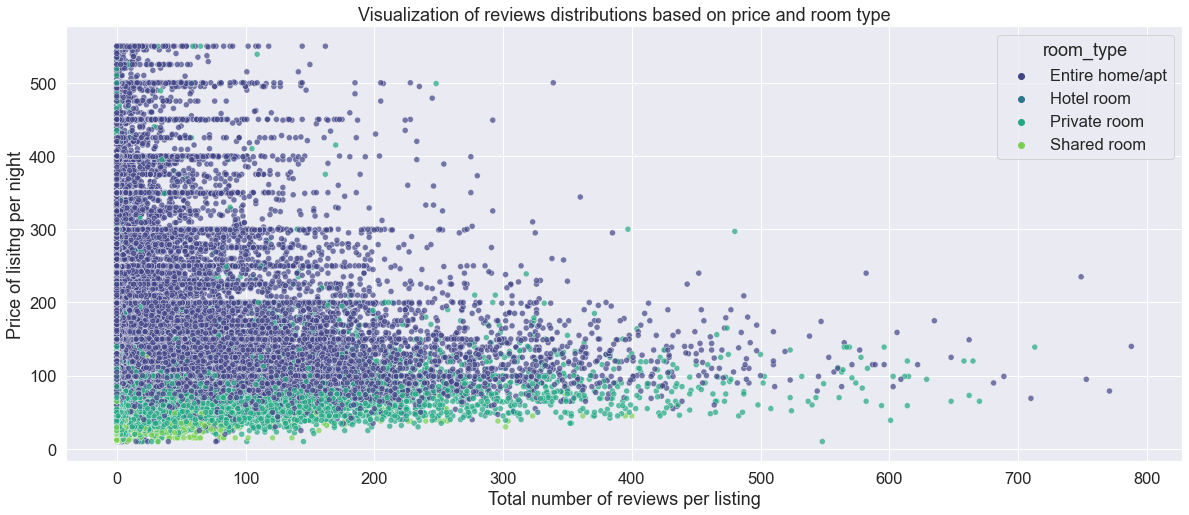

In [74]:
sns.scatterplot(data=data_95,y ="price", x="number_of_reviews",  hue= "room_type" ,palette="viridis",alpha=0.7)
plt.title("Visualization of reviews distributions based on price and room type")
plt.xlabel("Total number of reviews per listing")
plt.ylabel("Price of lisitng per night")
plt.show()

**Conclusions**

1] Lower price listings have more number of reviews in comparison to higher cost listings.

2] Also, noticed that the lisitngs with maximum reviews per month, are the total reviews range of less than $200.

3] The listings with maximum reviews are of the type Entire home and Private room.

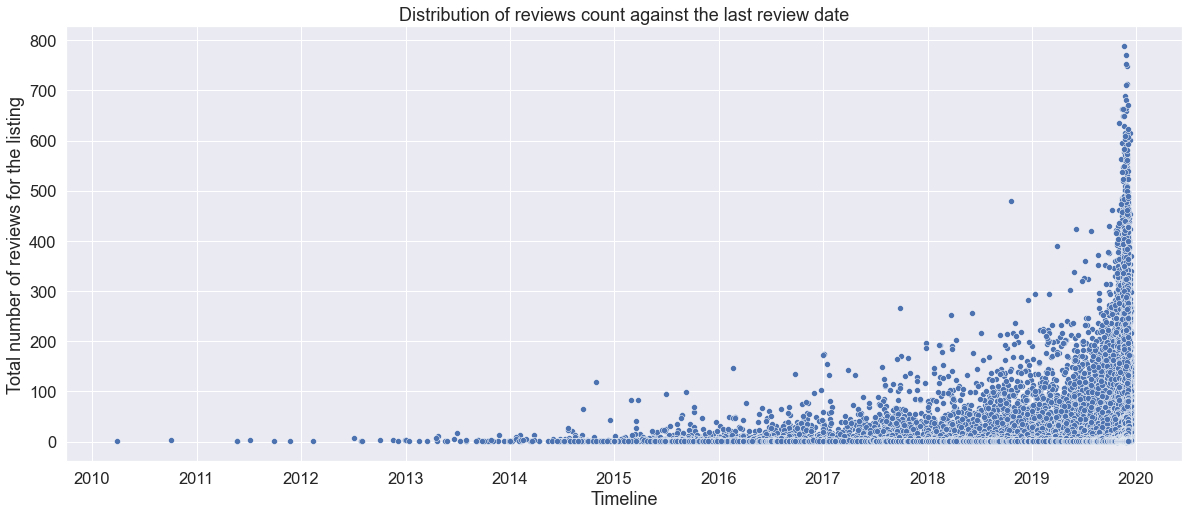

In [75]:
sns.scatterplot(x=data_95["last_review"],y=data_95["number_of_reviews"])
plt.title("Distribution of reviews count against the last review date")
plt.xlabel("Timeline")
plt.ylabel("Total number of reviews for the listing")
plt.show()

One can cocnlude that the most reviewed listings are the ones with latest reviews.

There is one listing which is last reviewed in late 2018 but has nearly 480 odd reviews.

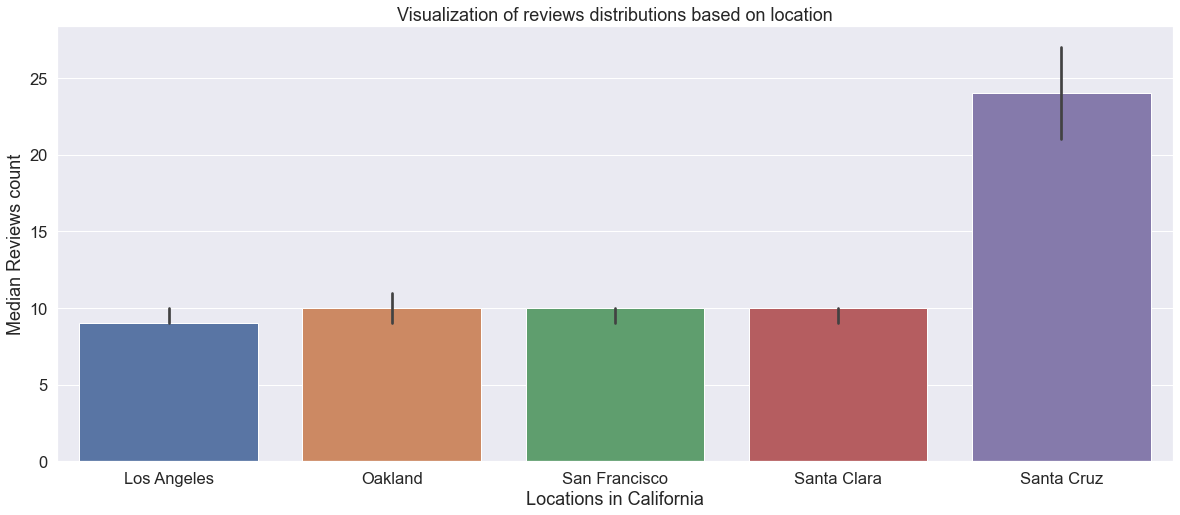

In [76]:
sns.barplot(data=data_95, x= "neighbourhood_group", y="number_of_reviews",estimator=np.median)
plt.title("Visualization of reviews distributions based on location")
plt.xlabel("Locations in California")
plt.ylabel("Median Reviews count")
plt.show()

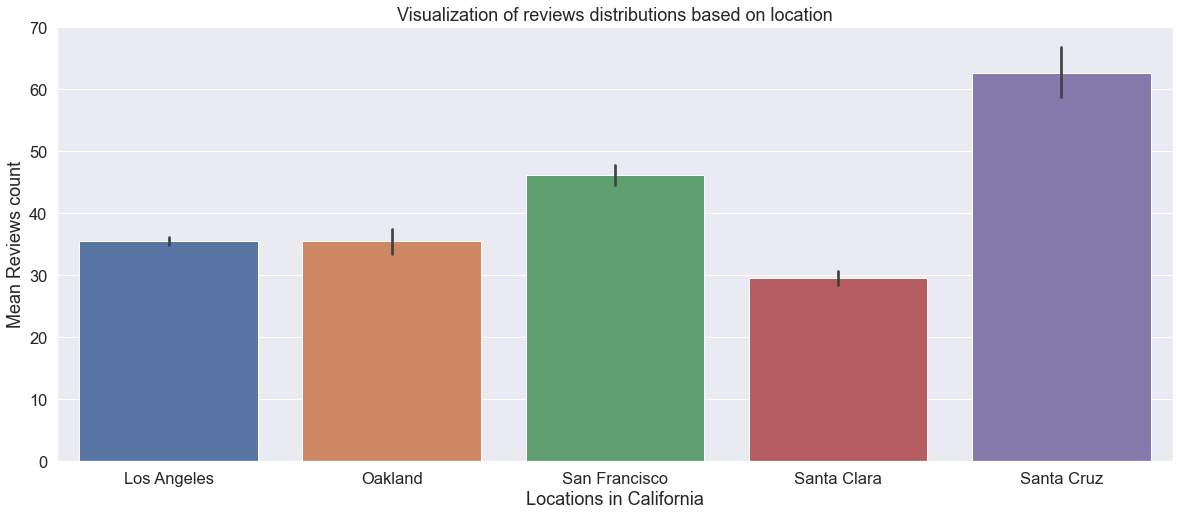

In [77]:
sns.barplot(data=data_95, x= "neighbourhood_group", y="number_of_reviews",estimator=np.mean)
plt.title("Visualization of reviews distributions based on location")
plt.xlabel("Locations in California")
plt.ylabel("Mean Reviews count")
plt.show()

From the above two graphs, we can conclude that
Mean reviews is highest for Santa Clara approx 62 followed by San Francisco approx 48.

However, on considering the median value, we see that Santa Cruz location is the one which gets most reviews and relatively all other locations get very low count of reviews.

**Analyzing the listings with maximum reviews**

In [78]:
print("Top 15 listings with maximum listings in decreasing order:")
data_95[["number_of_reviews","reviews_per_month","room_type","neighbourhood_group","price"]].sort_values(by="number_of_reviews",ascending=False).head(15)

Top 15 listings with maximum listings in decreasing order:


number_of_reviews  reviews_per_month        room_type  \
28                  788               6.54  Entire home/apt   
327                 771               8.51  Entire home/apt   
1779                753              10.88  Entire home/apt   
819                 749               8.80  Entire home/apt   
6                   713               5.66     Private room   
345                 710               7.89  Entire home/apt   
377                 689              13.13  Entire home/apt   
148                 681               6.64  Entire home/apt   
505                 670               7.46     Private room   
413                 665               7.74     Private room   
11                  662               6.48  Entire home/apt   
1403                662               8.60     Private room   
412                 658               7.65     Private room   
1265                648               8.25     Private room   
2864                648              10.06  Entire home/apt   

     neighbourhood_group  price  
28           Los Angeles    140  
327        San Francisco     79  
1779         Los Angeles     95  
819          Los Angeles    235  
6          San Francisco    139  
345        San Francisco     69  
377           Santa Cruz     99  
148          Los Angeles     90  
505          Los Angeles     65  
413        San Francisco    120  
11            Santa Cruz    149  
1403         Los Angeles     73  
412        San Francisco    120  
1265         Los Angeles     65  
2864         Los Angeles    125

In [79]:
print("Top 15 listings with maximum reviews per month in decreasing order:")
data_95[["number_of_reviews","reviews_per_month","room_type","neighbourhood_group","price"]].sort_values(by="reviews_per_month",ascending=False).head(15)

Top 15 listings with maximum reviews per month in decreasing order:


number_of_reviews  reviews_per_month        room_type  \
481                  250              44.38  Entire home/apt   
113                  410              21.21  Entire home/apt   
1060                  40              17.91     Private room   
18129                383              16.63     Private room   
17636                399              16.58  Entire home/apt   
35722                 38              16.29  Entire home/apt   
16353                428              16.23  Entire home/apt   
24151                209              15.68     Private room   
20760                 83              15.66     Private room   
13192                489              15.43  Entire home/apt   
1676                  46              15.16     Private room   
12731                486              14.88     Private room   
4467                 194              14.70  Entire home/apt   
9576                 561              14.63     Private room   
13193                462              14.54  Entire home/apt   

      neighbourhood_group  price  
481           Los Angeles     95  
113         San Francisco    185  
1060          Los Angeles    115  
18129         Los Angeles     47  
17636         Los Angeles     94  
35722         Los Angeles    300  
16353         Los Angeles    104  
24151         Los Angeles     50  
20760         Los Angeles     57  
13192         Los Angeles     95  
1676           Santa Cruz    175  
12731         Los Angeles     50  
4467          Santa Clara    149  
9576          Los Angeles     70  
13193         Los Angeles    135

**Conclusions**

1] Noticed that the listings with the highest reviews are not the same listings having maximum reviews per month. This implies that the listings with maximum ratings is due to their existingce for a longer period of time in AirBnB.

2] Noticed that majority of listings with maximum reviews as well as maximum reviews per month are of the Entire home type followed by Private rooms. This is expected as the majority of listings are of these two types.

3] Most of the highly reviewed listings are present in Los Angeles, San Francisco and Santa Cruz.

**Analyzing the corelation between price, number of reviews and reviews per month**

In [80]:
data_95[["price","number_of_reviews","reviews_per_month"]].corr()

price  number_of_reviews  reviews_per_month
price              1.000000          -0.062138          -0.082553
number_of_reviews -0.062138           1.000000           0.622619
reviews_per_month -0.082553           0.622619           1.000000

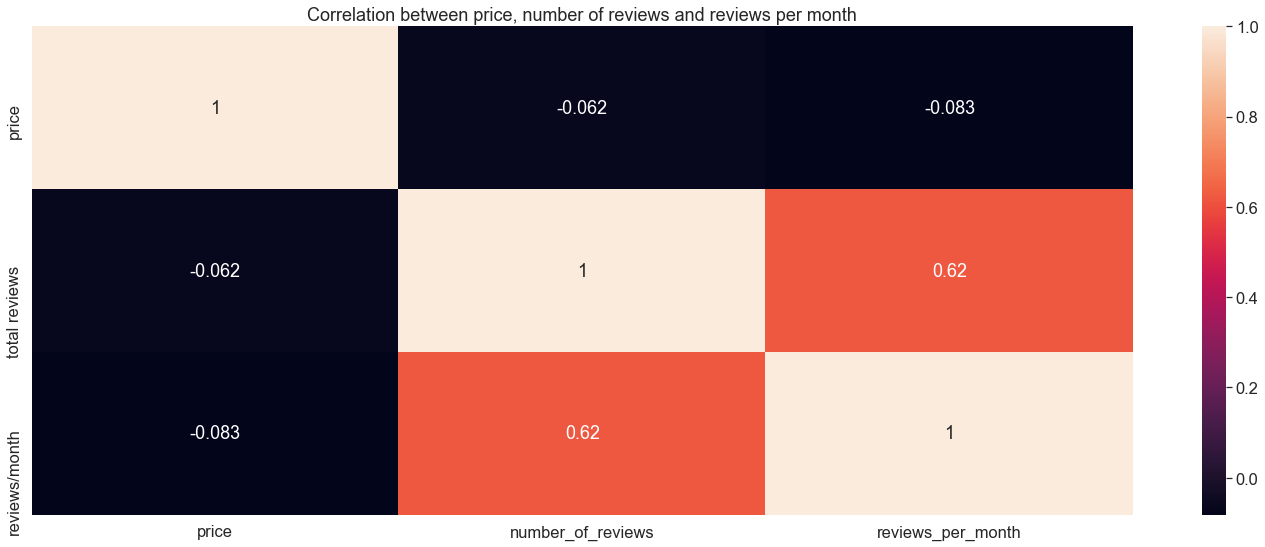

In [81]:
sns.heatmap(data_95[["price","number_of_reviews","reviews_per_month"]].corr(),yticklabels=["price","total reviews", "reviews/month"],annot=True)
plt.title("Correlation between price, number of reviews and reviews per month")
plt.tight_layout()
plt.show()

**Conclusions**

1] As price increases, both number of reviews and reviews per month decreases.

2] As a listing has more reviews, its reviews per month also increases (as expected).

**Analysing the availability_365 pattern**

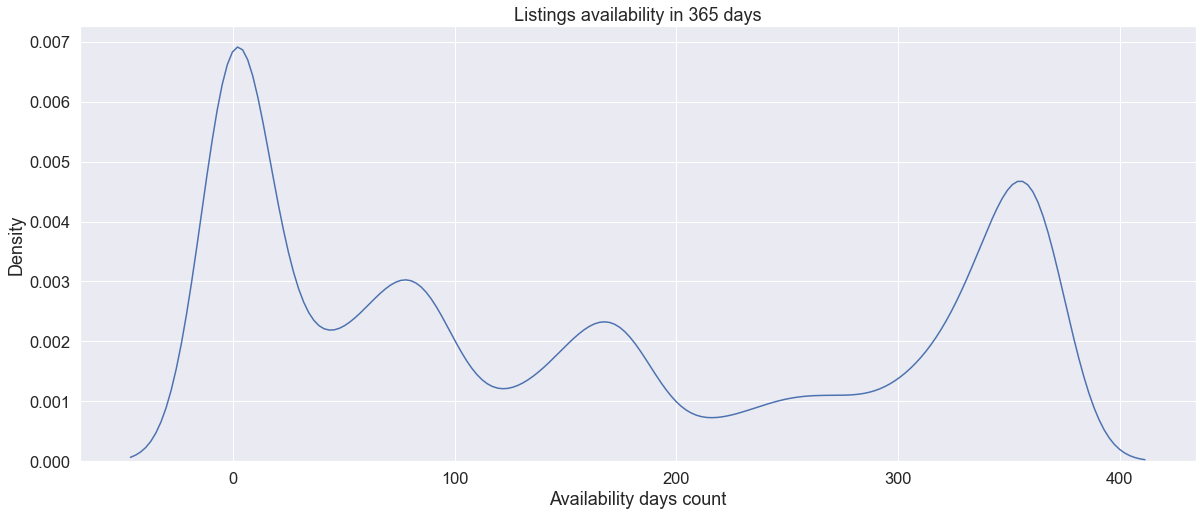

In [82]:
sns.kdeplot(data_95["availability_365"])
plt.title("Listings availability in 365 days")
plt.xlabel("Availability days count")
plt.show()

One can conclude that majority of the listings are available for short term stay (less than a week)

However, we see spikes in listings available for 3 months, 6 months and one year.

**Analyzing the words used in the lisitng name**

In [83]:
!pip install nltk

In [84]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Monika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
#Analysing the listing name behavior

#removing the stop words based on nltk english stop words and also removing punctuation, digits
import string
def words(col, stopwords):
    list_of_words = []
    for x in range(len(col)):
        temp = str(col[x]).split()
        
        for y in temp:
            if (str(y) not in stopwords)and (str(y).lower() not in string.punctuation) and (str(y).lower() not in string.digits):
                list_of_words.append(str(y).lower())
    return list_of_words

list_words_listings = words(list(data_95["name"]),en_stops)

In [86]:
len(list_words_listings)

306571

In [87]:
from collections import Counter

In [88]:
#Creating a data frame with the top 30 words in the listing name
popular_listing_name_words = pd.DataFrame(Counter(list_words_listings).most_common(30),columns=["words","count"])

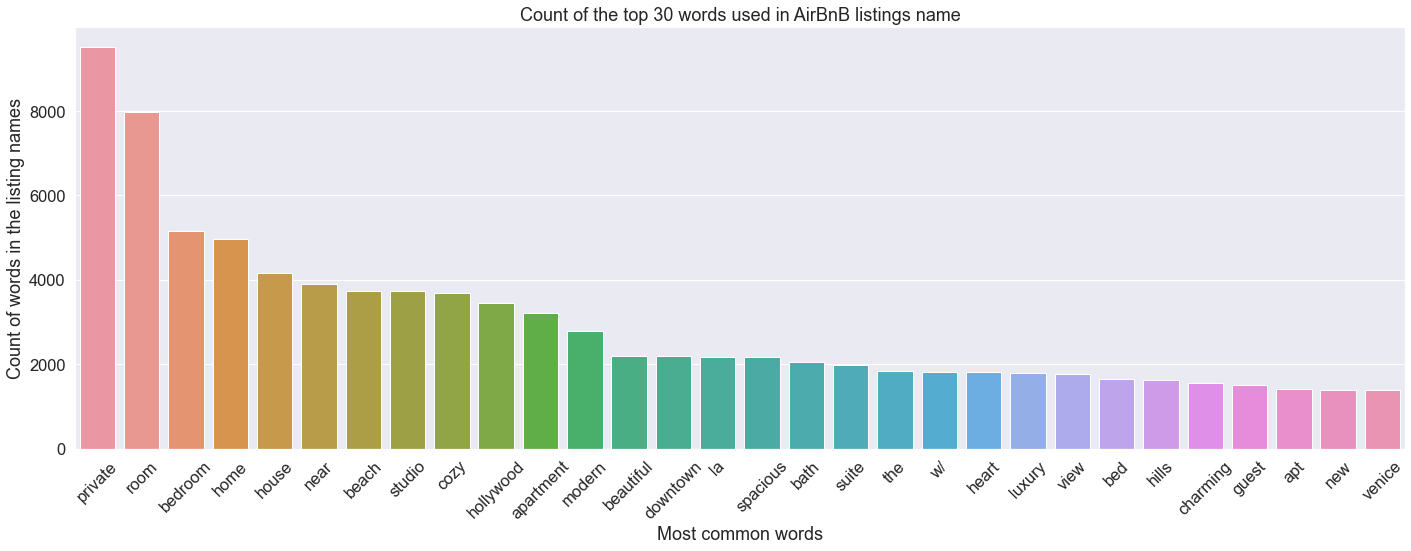

In [89]:
sns.barplot(data= popular_listing_name_words, x="words",y="count")
plt.xticks(rotation=45)
plt.title("Count of the top 30 words used in AirBnB listings name")
plt.xlabel("Most common words")
plt.ylabel("Count of words in the listing names")
plt.tight_layout()
plt.show()

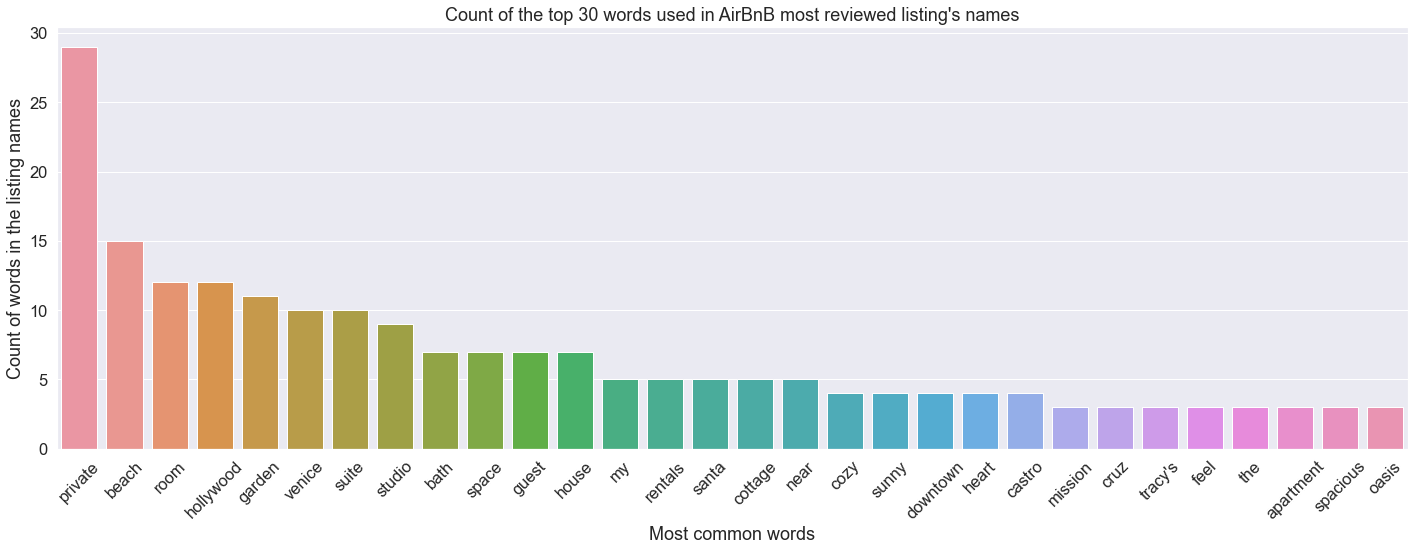

In [90]:
list_words_listings_with_max_reviews = words(list(data_95.sort_values(by="number_of_reviews",ascending = False).head(100)["name"]),en_stops)
popular_listing_name_words = pd.DataFrame(Counter(list_words_listings_with_max_reviews).most_common(30),columns=["words","count"])
sns.barplot(data= popular_listing_name_words, x="words",y="count")
plt.xticks(rotation=45)
plt.title("Count of the top 30 words used in AirBnB most reviewed listing's names")
plt.xlabel("Most common words")
plt.ylabel("Count of words in the listing names")
plt.tight_layout()
plt.show()

Noticed that the most common word types that are common as well as that are most reviewed mainly contain terms like "private" as well as amenities and near by tourist highlights in their names.

### Visualizing the top 100 words used in listings name with word cloud

In [91]:
! pip install wordcloud

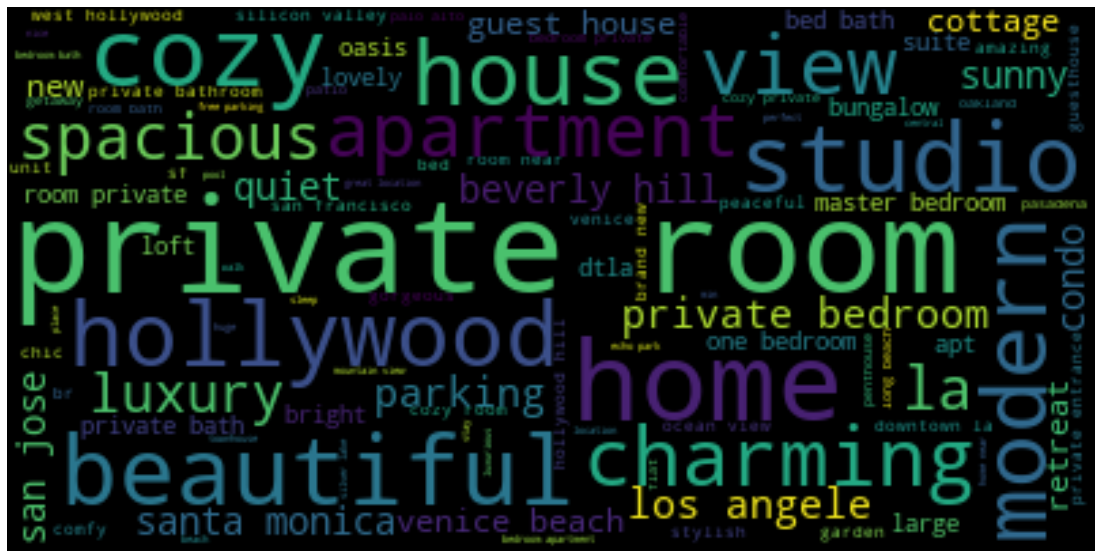

In [92]:
#Using word cloud to visualize the top 100 words used in listing names
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(wrd) for wrd in list_words_listings)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100).generate(text)
plt.figure(figsize=(20,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Noticed that the most common words used in listing names are "private", "cozy", "beautiful", "home", "room", "spacious", "studio" etc.

## Summary of the project

I used the various data cleaning, data summary and data visualization, geo spatial visualization techniques to analyze the AirBnB listings of the Los Angeles and San Francisco Bay region and found the following summary:

1] Noticed that Los Angeles has nearly 4.7 times the listings when compared to San Francisco.

2] Noticed that the price distribution is righ skewed with very few listings as costly as 25k per night.

3] The mean price of listings in LA is less by $40 when compared to the listings in San Francisco per night.

4] There are a lot of listings available for a minimum stay of 1, 2 as well as 30 days.

5] Also one can notice that, majority of the listings are of Entire home and Private room type.

6] Noticed that majority of lisitngs are concentrated near the downtown and tourist regions.

7] Most of the highly reviewed listings are present in  Santa Cruz, Los Angeles and San Francisco.

8] Noticed that the most common words used in listing names are "private", "cozy", "beautiful", "home", "room", "spacious", "studio" etc.